Medium sobre o assunto: https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a

Funções do sklean para seleção de features: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

In [ ]:
dfx_train = pd.read_csv('/content/drive/MyDrive/ML Estudo/prf_acidentes/x_train.csv')
dfy_train = pd.read_csv('/content/drive/MyDrive/ML Estudo/prf_acidentes/y_train.csv')

df = pd.concat([dfx_train, dfy_train], axis=1)
df.head()

,dia_semana,uf,br,tipo_acidente,fase_dia,km_intervalo,mes,cond_metereologica,pessoas
0,SABADO,RJ,116,CAPOTAMENTO,DIA,[300 - 350],NOV,CHUVA,2
1,QUINTA,SP,116,SAIDA,DIA,[500 - 550],SET,CEU CLARO,1
2,SEGUNDA,SP,101,CAPOTAMENTO,DIA,[0 - 50],FEV,CHUVA,1
3,SEGUNDA,SC,101,CAPOTAMENTO,DIA,[150 - 200],FEV,CHUVA,4
4,SABADO,RJ,101,SAIDA,NOITE,[150 - 200],MAI,CEU CLARO,2


In [ ]:
y_train = dfy_train.values.ravel()

In [ ]:
# Dummies do sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder().fit(df_xtrain)
x_train = ohe.transform(dfx_train)

ohe.categories_

[array(['DOMINGO', 'QUARTA', 'QUINTA', 'SABADO', 'SEGUNDA', 'SEXTA',
        'TERCA'], dtype=object),
 array(['RJ', 'SC', 'SP'], dtype=object),
 array([101, 116]),
 array(['ATROPELAMENTO', 'CAPOTAMENTO', 'COLISAO', 'OUTROS', 'QUEDA',
        'SAIDA', 'TOMBAMENTO'], dtype=object),
 array(['DIA', 'NOITE'], dtype=object),
 array(['[0 - 50]', '[100 - 150]', '[150 - 200]', '[200 - 250]',
        '[250 - 300]', '[300 - 350]', '[350 - 400]', '[400 - 450]',
        '[450 - 500]', '[50 - 100]', '[500 - 550]', '[550 - 600]'],
       dtype=object),
 array(['ABR', 'AGO', 'DEZ', 'FEV', 'JAN', 'JUL', 'JUN', 'MAI', 'MAR',
        'NOV', 'OUT', 'SET'], dtype=object),
 array(['CEU CLARO', 'CHUVA', 'NUBLADO', 'SOL'], dtype=object)]

In [ ]:
# Usar dummy do pandas
dfx_train['br'] = df_xtrain['br'].astype('str')
x_train = pd.get_dummies(dfx_train)
x_train.head()

,dia_semana_DOMINGO,dia_semana_QUARTA,dia_semana_QUINTA,dia_semana_SABADO,dia_semana_SEGUNDA,dia_semana_SEXTA,dia_semana_TERCA,uf_RJ,uf_SC,uf_SP,...,mes_JUN,mes_MAI,mes_MAR,mes_NOV,mes_OUT,mes_SET,cond_metereologica_CEU CLARO,cond_metereologica_CHUVA,cond_metereologica_NUBLADO,cond_metereologica_SOL
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
FEATURES = x_train.columns

In [ ]:
def plot_importances(pd_series):
    plt.figure(figsize=(12,8))
    plt.title('Importância')
    sns.barplot(x=pd_series, y=pd_series.index)

def create_series(element):
    return pd.Series(data=element, index=FEATURES)

### Árvore

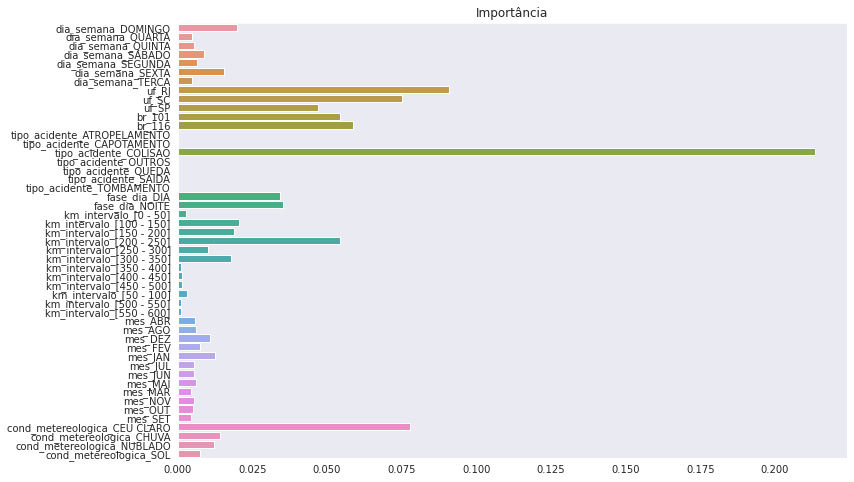

In [ ]:
# Usando árvore
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=13)
rf.fit(x_train, y_train)

importances = create_series(rf.feature_importances_)
plot_importances(importances)

### SelectKBest e SelectPercentile

In [ ]:
# Usando SelectKBest 
# Nesse caso a seleção é baseada em um teste estatístico
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression, r_regression

features_f = SelectKBest(f_regression, k=15).fit(x_train, y_train)
importances_f = create_series(features_f.scores_)

features_mutual = SelectKBest(mutual_info_regression, k=15).fit(x_train, y_train)
importances_mutual = create_series(features_mutual.scores_)

features_r = SelectKBest(r_regression, k=15).fit(x_train, y_train)
importances_r = create_series(features_r.scores_)

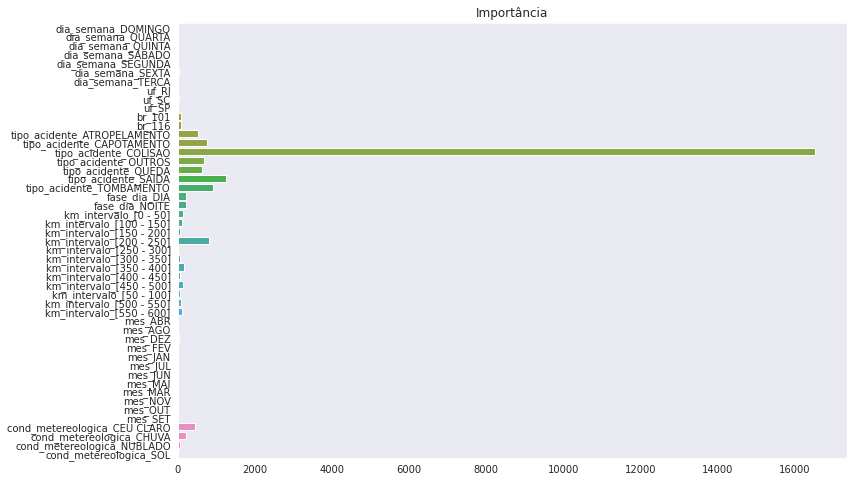

In [ ]:
plot_importances(importances_f)

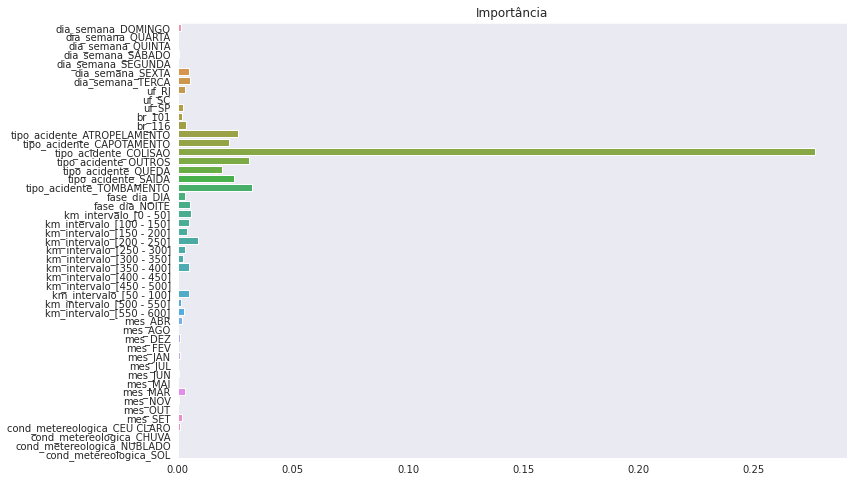

In [ ]:
plot_importances(importances_mutual)

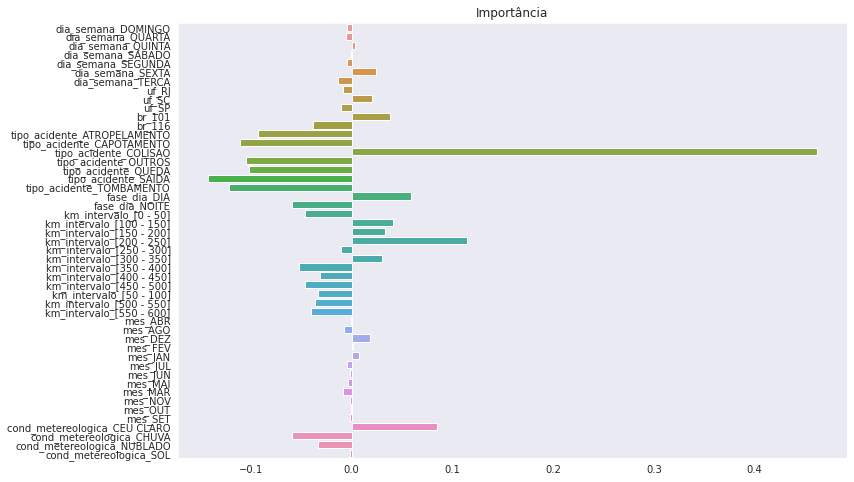

In [ ]:
plot_importances(importances_r)

Doc SelectKBest: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [ ]:
# Usando SelectPercentile 
# Nesse caso a seleção é baseada em um teste estatístico
# A escolha fica por conta do percentil, X% das features serão selecionadas
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression, mutual_info_regression, r_regression

features_f = SelectPercentile(f_regression, percentile=60).fit(x_train, y_train)
importances_f = create_series(features_f.scores_)

features_mutual = SelectPercentile(mutual_info_regression, percentile=60).fit(x_train, y_train)
importances_mutual = create_series(features_mutual.scores_)

features_r = SelectPercentile(r_regression, percentile=60).fit(x_train, y_train)
importances_r = create_series(features_r.scores_)

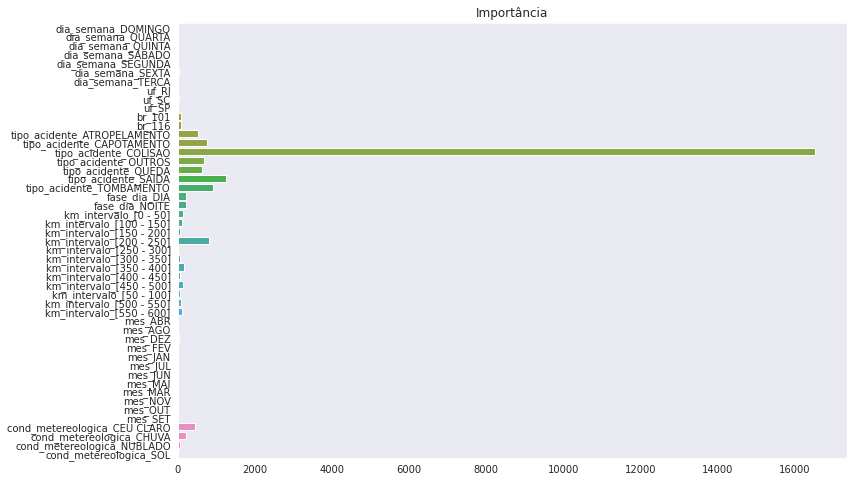

In [ ]:
plot_importances(importances_f)

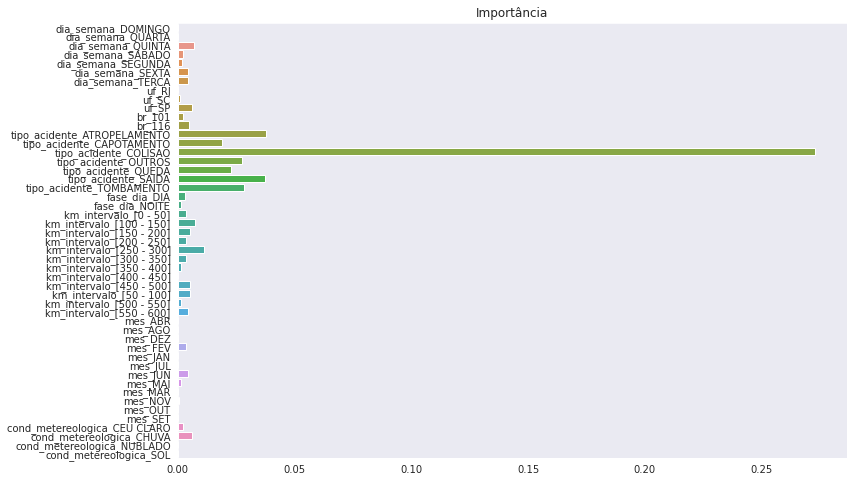

In [ ]:
plot_importances(importances_mutual)

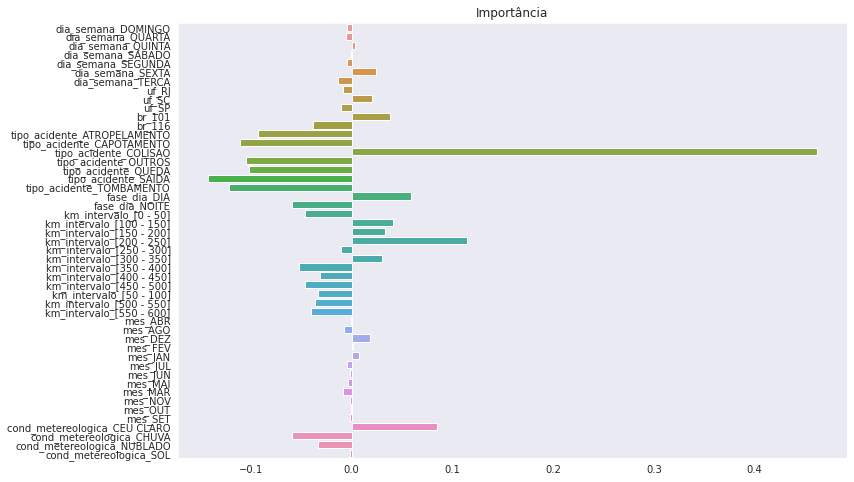

In [ ]:
plot_importances(importances_r)

Doc SelectPercentile: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

### RFE

In [ ]:
# Usando RFE
# Ele treina o modelo e retira as features 
# menos importantes por vez
from sklearn.feature_selection import RFE
rfe = RFE(rf, step=1).fit(x_train, y_train)

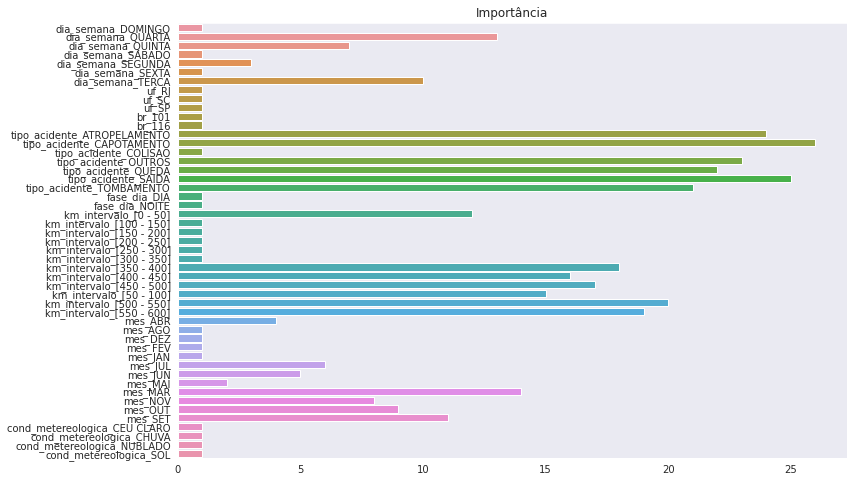

In [ ]:
# As features que permanecerão estão rankeadas como 1
importances = create_series(rfe.ranking_)
plot_importances(importances)

Doc RFE: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html?highlight=rfe#sklearn.feature_selection.RFE

### SelectFromModel



In [ ]:
# Usando SelectFromModel
# É possível definir um threshold e as features serão
# removidas caso não passem por ele
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf).fit(x_train, y_train)

In [ ]:
# Features selecionadas
sfm.get_feature_names_out()

array(['uf_RJ', 'uf_SC', 'uf_SP', 'br_101', 'br_116',
       'tipo_acidente_COLISAO', 'fase_dia_DIA', 'fase_dia_NOITE',
       'km_intervalo_[100 - 150]', 'km_intervalo_[200 - 250]',
       'cond_metereologica_CEU CLARO'], dtype=object)

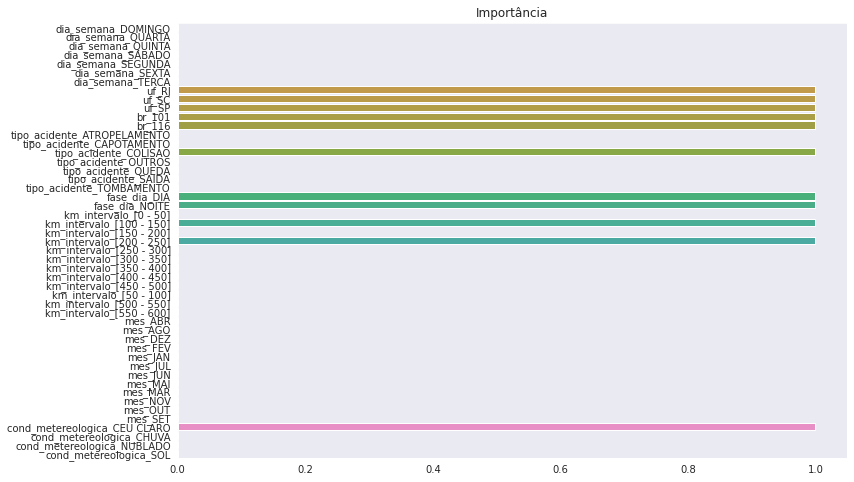

In [ ]:
importances = create_series(sfm.get_support())
plot_importances(importances)

### Coeficientes

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

rd = Ridge()
sfm = SelectFromModel(rd).fit(x_train, y_train)

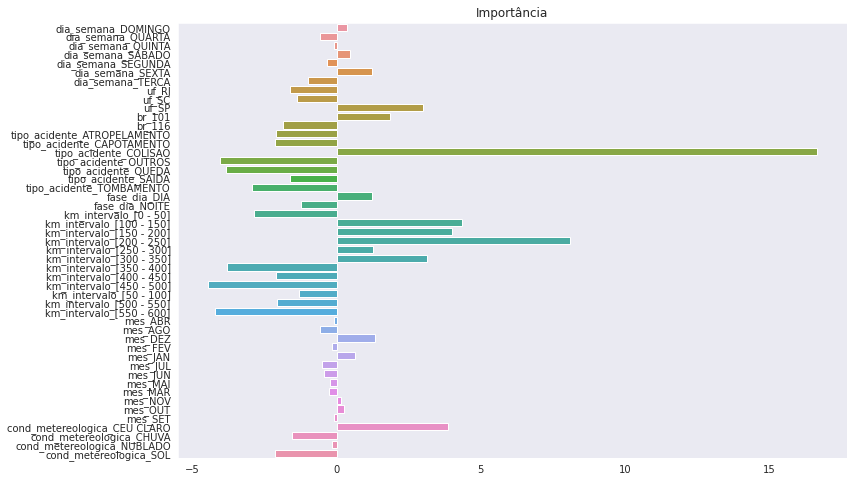

In [ ]:
importances = create_series(sfm.estimator_.coef_)
plot_importances(importances)